<a href="https://colab.research.google.com/github/felipeqpedropy/data_science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://lifeofcanada.com/wp-content/uploads/2018/02/canada-nature-flag-wallpaper-1.jpg">

# **Análise dos Dados do Airbnb - Vancouver**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2021-12-11/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel 
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - nome do anfitrião 
* neighbourhood_group - esta coluna não tem nenhum valor valido
* neighbourhood - nome do bairro
* latitude - latitude da propriedade
* longitude - longitude da propriedade
* room_type - o tipo de quarto oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade de mínima de noites para reservar
* number_of_reviews - número de reviews que uma propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imoveis do mesmo proprietário
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - numero de reviews fidelizados
* license - licença da propriedade

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28872,-123.12046,Entire home/apt,158,90,16,2017-02-26,0.13,39,0,0,18-476608
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24773,-123.10509,Entire home/apt,150,2,254,2021-11-26,1.77,1,164,7,20-160253
2,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,85,30,431,2021-11-15,3.09,1,46,2,18-611603
3,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,91,2021-10-31,0.71,1,246,3,NaN
4,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.25,1,14,1,21-156500


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print('Entradas: ', df.shape[0])
print('Variáveis: ', df.shape[1])

# verificar as 5 primeiras entradas do dataset
print('\n')
print(df.dtypes)

Entradas:  4531
Variáveis:  18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.297285
reviews_per_month                 0.165306
last_review                       0.165306
host_name                         0.000221
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

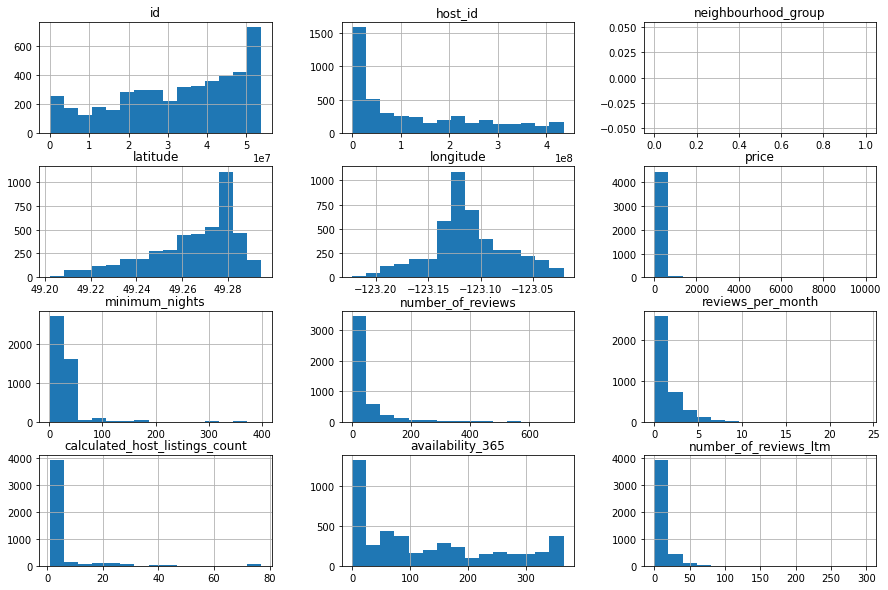

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
# ver a média da coluna `price``
df.price.mean()

178.96799823438533

### **Q4. Qual a correlação existente entre as variáveis**

In [8]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.008619,-0.055226,-0.048512,-0.042996,0.075601
minimum_nights,0.008619,1.000000,-0.142168,-0.238570,0.120258,0.150121
number_of_reviews,-0.055226,-0.142168,1.000000,0.575625,-0.155877,0.007079
reviews_per_month,-0.048512,-0.238570,0.575625,1.000000,-0.157874,0.058694
calculated_host_listings_count,-0.042996,0.120258,-0.155877,-0.157874,1.000000,0.015888
availability_365,0.075601,0.150121,0.007079,0.058694,0.015888,1.000000


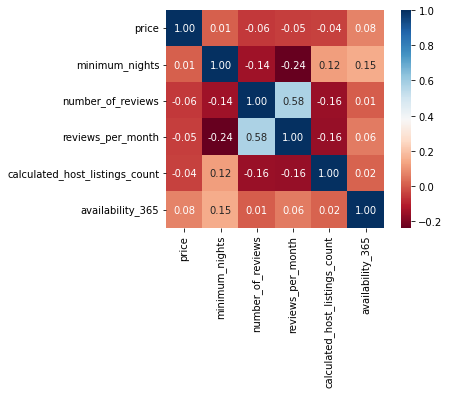

In [9]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [10]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    3655
Private room        861
Shared room          10
Hotel room            5
Name: room_type, dtype: int64

In [11]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.806665
Private room       0.190024
Shared room        0.002207
Hotel room         0.001104
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [12]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
West Point Grey      560.761194
Arbutus Ridge        359.571429
Dunbar Southlands    233.547826
Kitsilano            213.273743
Strathcona           194.103448
Downtown             193.588285
West End             176.421911
Shaughnessy          174.493151
Downtown Eastside    173.620087
Fairview             167.376923
Name: price, dtype: float64

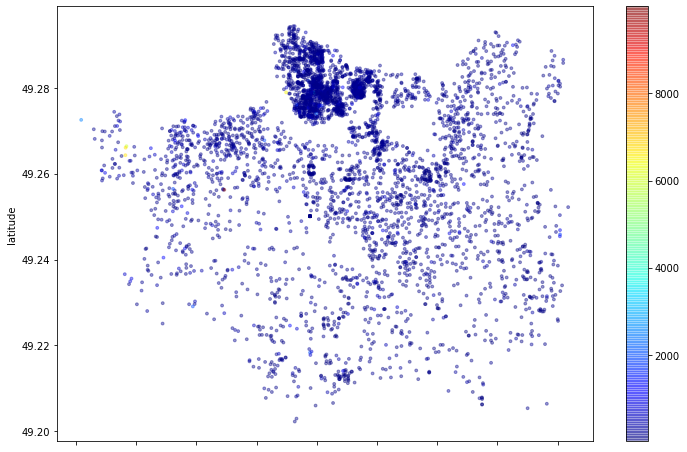

In [13]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [14]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

18.223350253807105

## Conclusões


Foi feita uma análise bem superficial dos dados da base do **Airbnb**, nota-se pelo histograma aprensentado que têm alguns `outliers` (dados fora do padrão) nessa análise exploratória. 

* Para trata-los, deve-se utilizar outros conhecimentos que serão tratados em outros artigos futuros. 

Após a analise da média dos **preços por bairros**, há possibilidades de distorção dos dados estátisticos por ter poucos imóveis naquele bairro, dessa forma aumentando o preço médio dos imóveis nos bairros apresentados.

* Resolveremos com a biblioteca **matplolib** em análises futuras.

Lembre-se que a idéia desse artigo é mostrar um conhecimento básico sobre algumas bibliotecas, como a principal o **pandas**. Pratique sempre e refaça os *exercícios* desse artigo para fixar o conteúdo. **Até a próxima**

✅ "Há mais pessoas que desistem do que pessoas que fracassam" - Henry Ford 





